<a href="https://colab.research.google.com/github/Gans-99/Jornada-Dados/blob/main/Meu_Primeiro_Projeto_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sprint 1: O "Arroz com Feijão" do Cientista

In [18]:
import pandas as pd

# Carregando o arquivo que eu acabei de subir
df = pd.read_csv('train.csv')

# Verificando se carregou certo
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.shape

(891, 12)

In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
# Média das idades de todos os passageiros
df['Age'].mean()

np.float64(29.69911764705882)

In [22]:
# Quantas mulheres sobreviveram?
(df[df['Sex']=='female']['Survived']==1).sum()

np.int64(233)

In [23]:
# 1 Calculando a mediana
mediana_idade = df['Age'].median()

# 2 Preenchendo os valores nulos
df['Age'] = df['Age'].fillna(mediana_idade)

# 3 Verificando se ainda restam nulos em Age
print(f"Nulos após o tratamento em Age: {df['Age'].isnull().sum()}")

Nulos após o tratamento em Age: 0


In [24]:
# Qual era a idade do passageiro mais velho?
passageiro_mais_velho = df['Age'].max()

# Quantas pessoas viajaram na 1ª Classe?
qtd_pessoas_classe1 = (df['Pclass']==1).sum()

# Qual foi a média de valor pago nas passagens
valor_medio_passagens = df['Fare'].mean()

print('Idade do passageiro mais velho: {:.0f}\n1ª Classe: {}\nMédia valor passagens: {:.2f}'.format(passageiro_mais_velho, qtd_pessoas_classe1, valor_medio_passagens))

Idade do passageiro mais velho: 80
1ª Classe: 216
Média valor passagens: 32.20


#Sprint 2: Visualização e Storytelling

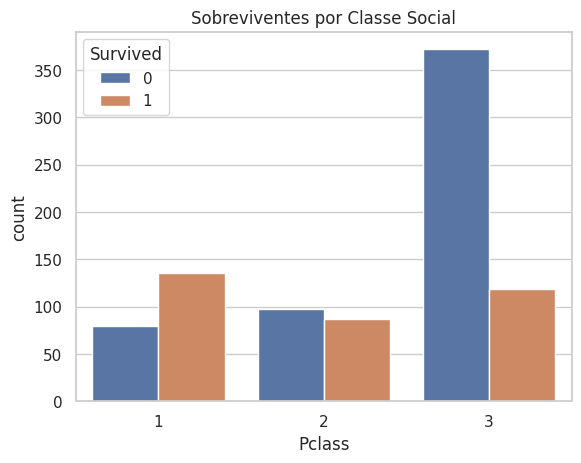

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo um estilo visual mais bonito
sns.set_theme(style="whitegrid")

# A classe social influenciou na sobrevivência?
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Sobreviventes por Classe Social')
plt.show()

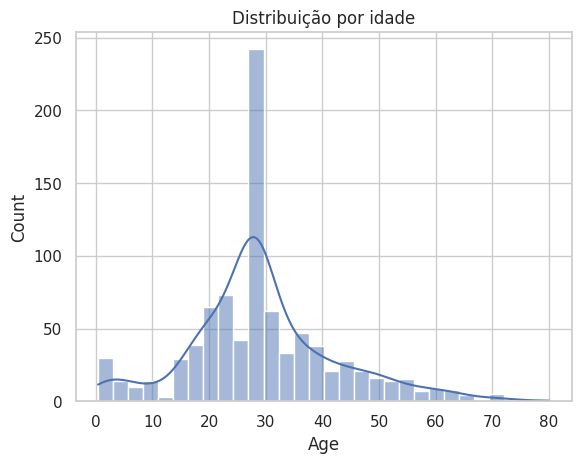

In [26]:
# Qual a distribuição de idade dos passageiros?
sns.histplot(df['Age'], kde=True)
plt.title('Distribuição por idade')
plt.show()

# Sprint 3: Engenharia de Atributos (Feature Engineering)

In [27]:
#df.isnull().sum()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Somando os parentes + 1 (a própria pessoa)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Média de sobrevivência por família
df[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [29]:
# Segmentação
# Criando coluna categórica "Tipo_Passageiro"
def categorizar_idade(idade):
  if idade < 12:
    return 'Criança'
  elif idade < 60:
    return 'Adulto'
  else:
    return 'Idoso'

# Aplicando função na coluna Age e criando uma nova coluna
df['Tipo_Passageiro'] = df['Age'].apply(categorizar_idade)

# Contando quantos tem de cada tipo
print(df['Tipo_Passageiro'].value_counts())

Tipo_Passageiro
Adulto     797
Criança     68
Idoso       26
Name: count, dtype: int64


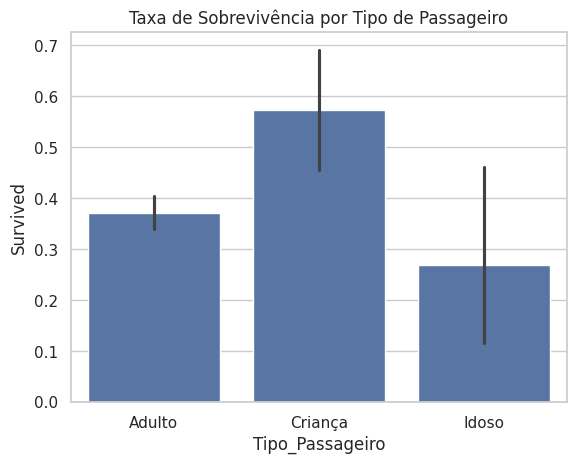

In [30]:
# Taxa de sobrevivência por tipo de passageiro
sns.barplot(data=df, x='Tipo_Passageiro', y='Survived')
plt.title('Taxa de Sobrevivência por Tipo de Passageiro')
plt.show()


#Sprint 4: Machine Learning (O Grand Finale)
#### Criação de modelo que, informando os dados de um passageiro novo, ele me diz se a pessoa sobrevive ou morre.

In [35]:
# Transformando Sex em 0 e 1 (0 para homem, 1 para mulher)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Selecionando as colunas que vamos usar para a previsão (Features)
caracteristicas = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize']
X = df[caracteristicas]
y = df['Survived'] # O que queremos prever


Sex
0    577
1    314
Name: count, dtype: int64


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Separando os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

# Verificando a acurácia (O quanto ele acertou)
acuracia = modelo.score(X_teste, y_teste)
print(f"Acurácia do modelo: {acuracia * 100:.2f}%")

Acurácia do modelo: 81.56%


In [48]:
# Exemplo: Pclass=1, Sex=0 (homem), Age=25, Fare=100, FamilySize=1
# Sem a criação do mini dataframe (possível erro)
# dados_exemplo = [[2, 0, 26, 50, 1]]
# previsao = modelo.predict(dados_exemplo)

# Criando um mini dataframe
dados_exemplo_df = pd.DataFrame([[2, 0, 26, 50, 1]], columns=['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize'])
previsao = modelo.predict(dados_exemplo_df)

if previsao[0] == 1:
    print("Você sobreviveria!")
else:
    print("Infelizmente, você não resistiria.")

Infelizmente, você não resistiria.
